# Kaggle Competition | Titanic: Machine Learning From a Disaster

![Titanic](header.png)

### Competition Description
> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

> ** Goal **

>It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

> ** Metric**

>Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.


 
### Steps taken in this Notebook
1. Data Wrangling
    * Loading the datasets with Pandas
    * Visualizing missing data with MissingNo
    * Checking correlation between survival and individual factors  
<br> 
2. Feature Engineering
    * Feature engineering of new columns
        * Passenger Title
        * Family Size
        * Travelling Alone?  
<br> 
3. Imputing Missing Data Values
    * Randomizing the two missing Embarked values
    * Imputing the missing fare value using the average fare paid by each Pclass
    * Testing various ML Regression algorithms to predict age
        * Linear Regression
        * Bayesian Ridge
        * Multilayer Perceptron (MLP)
        * Decision Tree
        * Bagging
    * Using Multilayer Perceptron (MLP) to predict the missing age values
<br> <br>
4. Predict Survival
    * Test various ML Classifier algorithms to predict Survival
        * Logistic Regression
        * Support Vector 
        * Decision Tree 
        * Random Forest 
        * Adaptive Boosting 
        * Multilayer Perceptron (MLP) 
        * K-Nearest Neighbours (KNN) 

    * Using MLP to predict Survival
    * Formatting output for submission

<br> 

### Required Libraries
* Numpy
* Pandas
* Missingno
* Seaborn
* Matplotlib
* Random
* SciKit-Learn


## Data Wrangling

#### Loading the datasets with Pandas

In [705]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, randint
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

train_dat = pd.read_csv('train.csv')
test_dat = pd.read_csv('test.csv')
all_dat = [train_dat, test_dat]

##### Training Dataset

In [651]:
display(train_dat.head(3))
display(train_dat.info())
display(train_dat.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Testing Dataset

In [652]:
display(test_dat.head(3))
display(test_dat.info())
display(test_dat.describe())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Let's examine the data briefly:
The Name, Sex, Ticket, Cabin, and Embarked are listed as strings
The remaining lists (PassengerId, Age, SibSp, Parch, and Fare) are reported as integers, but some of them represent categories of values. These nominal values must be converted to dummy variables when creating models

Many of the columns have some missing values, and are difficult to conceptualize when reported in a table form (using `info()`). We will use the `missingno` package to make it easier to visualize where the missing values lie, and what proportions are the data are missing

### Visualizing missing data with missingno

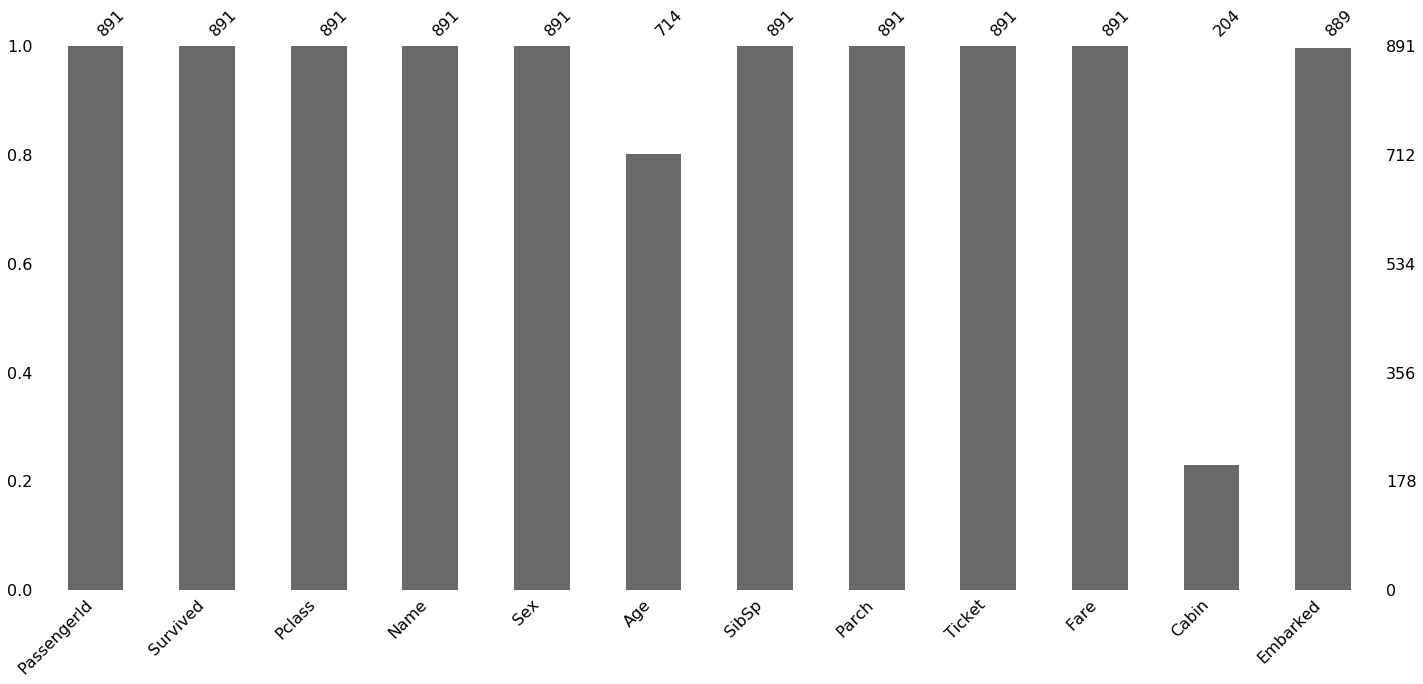

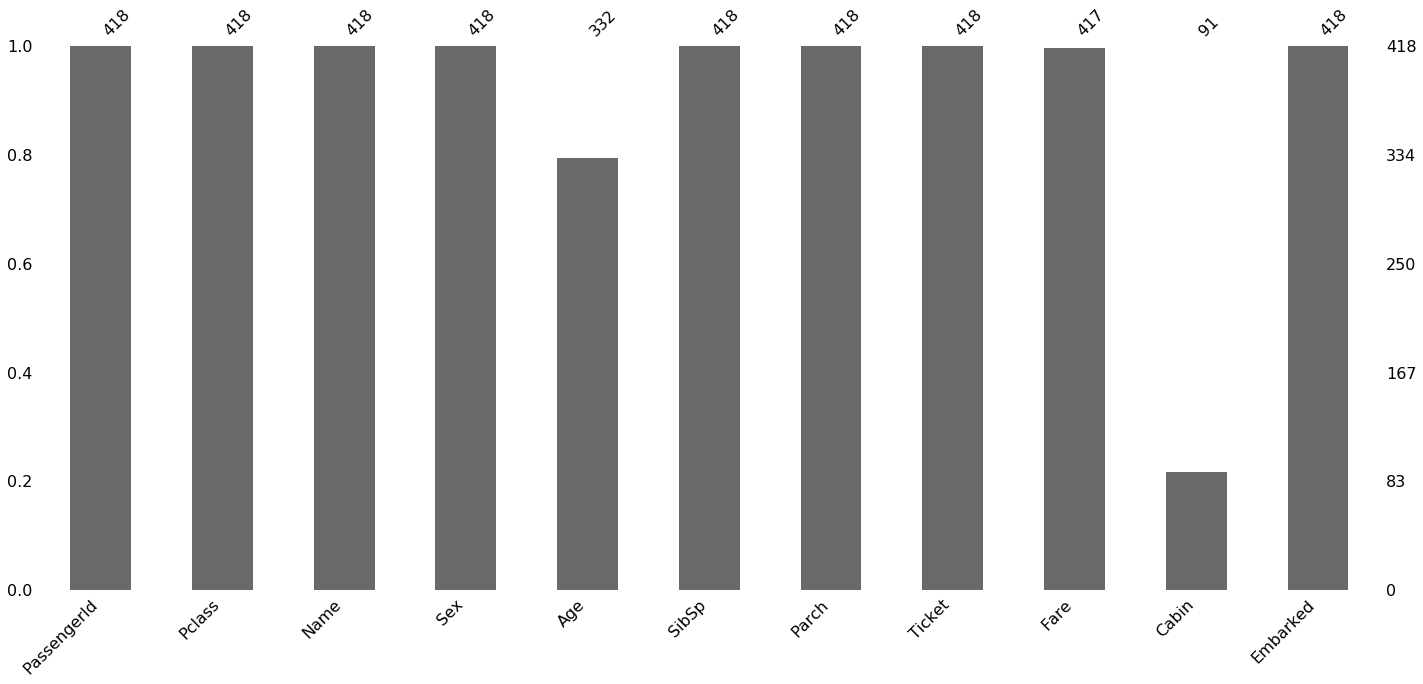

In [653]:
import missingno as msno
display(msno.bar(train_dat))
display(msno.bar(test_dat))
train_dat.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test_dat.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In the Cabin column, we only have approximately 20% of values present in both datasets. There are too many missing values to attempt to impute the values. As such, we will drop it from the analysis

The Age column is missing approximately 20% of the values, but there are enough values present to impute the missing values. We will create an entire machine learning regression model for the missing age values later on

The training dataset contains two missing values for the Embarked data. Since there are only three possible options, we will randomly select values to fill the missing values

The test dataset contains one missing value for the Fare, which we will impute later based on the Pclass



### Checking correlation between survival and categorical factors

In [654]:
train_dat.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Pclass

In [655]:
train_dat[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### Sex

In [656]:
train_dat[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Age

Ks_2sampResult(statistic=0.0887768379960963, pvalue=0.12555581240058969)

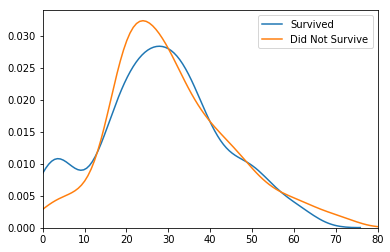

In [657]:
age_survived = train_dat.loc[train_dat['Survived'] == 1]['Age'].dropna()
age_dead = train_dat.loc[train_dat['Survived'] == 0]['Age'].dropna()

fig = sns.kdeplot(age_survived, label='Survived', clip=[0,80])
fig.set(xlim=(0, 80))
sns.kdeplot(age_dead, label='Did Not Survive')

ks_2samp(age_survived, age_dead)

#### Sibsp

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


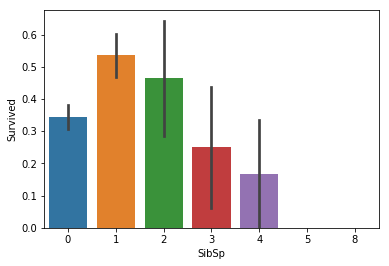

In [658]:
sns.barplot(train_dat['SibSp'], train_dat['Survived'])
display(train_dat[['Parch', 'Survived']].groupby('Parch').mean())

#### Parch

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


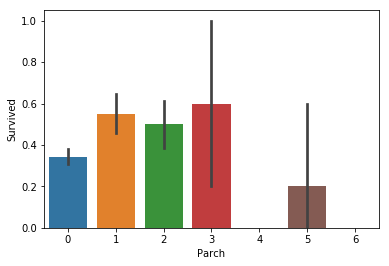

In [659]:
sns.barplot(train_dat['Parch'], train_dat['Survived'])
display(train_dat[['Parch', 'Survived']].groupby('Parch').mean())

#### Fare

Ks_2sampResult(statistic=0.30236794171220405, pvalue=1.8678359776799793e-17)

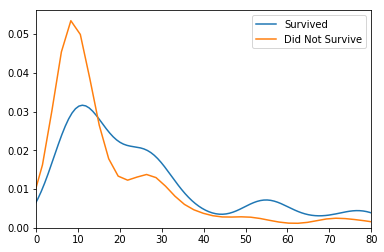

In [660]:
fare_survived = train_dat.loc[train_dat['Survived'] == 1]['Fare'].dropna()
fare_dead = train_dat.loc[train_dat['Survived'] == 0]['Fare'].dropna()

fig = sns.kdeplot(fare_survived, label='Survived', clip=[0,80])
fig.set(xlim=(0, 80))
sns.kdeplot(fare_dead, label='Did Not Survive')
ks_2samp(fare_survived, fare_dead)

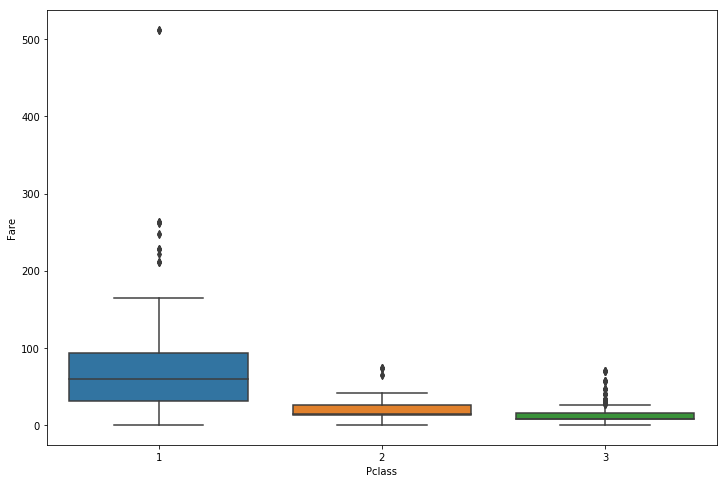

In [661]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(train_dat['Pclass'], train_dat['Fare'])

## Feature Engineering

#### Extract Passenger Title
We will attempt to extract titles from the name

In [662]:
import re as re
def title_extract_function(string):
    title = re.search('([A-Za-z]+)\.', string)[0]
    return title

for df in all_dat:
    df['Title'] = df['Name'].apply(title_extract_function)

display(pd.crosstab(all_dat[0]['Title'], all_dat[0]['Sex']))
display(pd.crosstab(all_dat[1]['Title'], all_dat[1]['Sex']))


Sex,female,male
Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


Sex,female,male
Title,,
Col.,0,2
Dona.,1,0
Dr.,0,1
Master.,0,21
Miss.,78,0
Mr.,0,240
Mrs.,72,0
Ms.,1,0
Rev.,0,2


Some titles are held by a select few, and will be grouped into an "Other" category

In [663]:
for df in all_dat:
    df['Title'] = df['Title'].replace(['Mlle.', "Ms."], 'Miss.')
    df['Title'] = df['Title'].replace(['Mme.'], 'Mrs.')
    df['Title'] = df['Title'].replace(['Capt.','Col.','Countess.','Don.', 'Dona.','Dr.','Jonkheer.','Lady.', 'Major.', 'Rev.',
                                       'Sir.'],'Other')

train_dat[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master.,0.575000
Miss.,0.702703
Mr.,0.156673
Mrs.,0.793651
Other,0.347826


#### Family Size

In [664]:
for df in all_dat:
    df['Family Size'] = df['Parch'] + df['SibSp'] +1

train_dat[['Family Size', 'Survived']].groupby('Family Size').mean()

,Survived
Family Size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


#### Travelling Alone?

In [665]:
for df in all_dat:
    df['Alone'] = 0
    df.loc[df['Family Size'] == 1, 'Alone'] = 1
train_dat[['Alone', 'Survived']].groupby('Alone').mean()

,Survived
Alone,
0,0.505650
1,0.303538


### Imputing Missing Data Values

#### Embarked

In [666]:
random.seed(1234)
while train_dat['Embarked'].isna().sum() > 0:
    train_dat['Embarked'].fillna(random.randint(1,3), limit=1, inplace=True)
train_dat['Embarked'].replace({1:"S", 2:"C", 3:"Q"}, inplace=True)

train_dat[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.556213
Q,0.389610
S,0.337984


#### Fare Class

In order to fill in the missing Fare value, we use the most correlated factor(s)

In [667]:
Fare_corr = pd.DataFrame(train_dat.corr()['Fare'].drop(['Fare'],axis=0))
Fare_corr.reindex(Fare_corr.Fare.abs().sort_values(inplace=False, ascending=False).index)

,Fare
Pclass,-0.549500
Alone,-0.271832
Survived,0.257307
Family Size,0.217138
Parch,0.216225
SibSp,0.159651
Age,0.096067
PassengerId,0.012658


The most significant factor that is correlated with Fare is the **Pclass**. We will impute the missing fare value based average value of the passenger's class

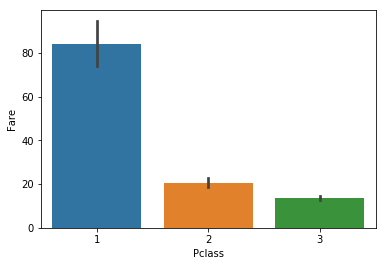

In [668]:
sns.barplot(x=train_dat['Pclass'], y=train_dat['Fare'])

average_fare_by_class = test_dat.groupby(by=['Pclass'], as_index=False)['Fare'].mean()

if (test_dat.loc[test_dat['Fare'].isnull(),'Pclass'] == 3).values[0] == True:
    test_dat.loc[test_dat['Fare'].isnull(),'Fare'] = average_fare_by_class[average_fare_by_class['Pclass'] == 1]['Fare'][0]
elif (test_dat.loc[test_dat['Fare'].isnull(),'Pclass'] == 2).values[0] == True:
    test_dat.loc[test_dat['Fare'].isnull(),'Fare'] = average_fare_by_class[average_fare_by_class['Pclass'] == 2]['Fare'][0]
else:
    test_dat.loc[test_dat['Fare'].isnull(),'Fare'] = average_fare_by_class[average_fare_by_class['Pclass'] == 3]['Fare'][0]

Now that we have filled in the missing fare value, we can cut the range of Fares into distinct categorical groups. An easy way to visualize the distribution is through a violin plot.

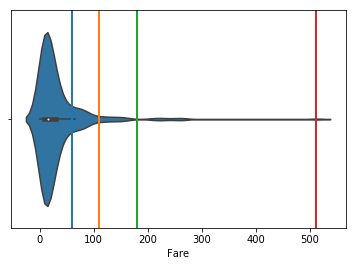

In [669]:
sns.violinplot(train_dat['Fare'])
max_fare = train_dat['Fare'].max()
plt.plot([60, 60], [-1, 1], linewidth=2)
plt.plot([110, 110], [-1, 1], linewidth=2)
plt.plot([180, 180], [-1, 1], linewidth=2)
plt.plot([max_fare, max_fare], [-1, 1], linewidth=2)

We can use the plot to divide the Fares into four groups:
1. Fare Type 1 = \$0 - \$60    
2. Fare Type 2 = \$61 - \$110    
3. Fare Type 3 = \$111 - \$180    
4. Fare Type 4 = \$181+

Next, we need to test if the correlation between **Fare Type** and **Survival**

In [670]:
for df in all_dat:
    df['Fare Type'] = pd.cut(df['Fare'], [0, 60, 110,180, 1000], labels=['1', '2', '3', "4"])

train_dat[['Fare Type', 'Survived']].groupby('Fare Type').mean()

,Survived
Fare Type,
1,0.343501
2,0.616438
3,0.793103
4,0.700000


### Predicting the missing age values 

In [671]:
display(all_dat[0].head(2))
display(all_dat[1].head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family Size,Alone,Fare Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,0,2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family Size,Alone,Fare Type
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr.,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs.,2,0,1


#### Convert Categorical Data into Dummy Variables

In [672]:
categorical_df = []
for df in all_dat:
    sex = pd.get_dummies(df['Sex'],drop_first=True)
    embark = pd.get_dummies(df['Embarked'],drop_first=True)
    title = pd.get_dummies(df['Title'], drop_first=True)
    fare = pd.get_dummies(df['Fare Type'], drop_first=True)
    dummies = pd.concat([sex, embark, title, fare], axis=1)
    df2 = df.drop(['Sex','Embarked','Name','Fare','Fare Type','Title'], axis=1, inplace=True)
    df3 = pd.concat([df, sex, embark, title, fare], axis=1)
    categorical_df.append(df3)

#### Separate the missing data from the complete data

In [695]:
missing_age = categorical_df[0][pd.isnull(categorical_df[0]).any(axis=1)].drop(['PassengerId'], axis=1)
complete_age = categorical_df[0].dropna().drop(['PassengerId'], axis=1)

#### Find the optimal machine learning regression algorithm
Since we are predicting the numeric values of age, we calculated the accuracy of the model using the RMSE (root-mean-square error) and the MAE (mean absolute error).

The ML regression algorithms tested are:
    1. Linear Regression
    2. Bayesian Ridge
    3. Multilayer Perceptron (MLP)
    4. Decision Tree
    5. Bagging Regressor

We repeated the testing of each algorithm 1,000 times with differen splits for the training and testing splits. We used the resulting averages of RMSE and MAE to determine the best algorithm to use to predict the missing age values. **The resulting algorithm with the lowest RMSE/MAE values will be used**

In [698]:
total_RMSE = pd.DataFrame(columns=["LM RMSE", "BRR RMSE", "NNR RMSE", "DTR RMSE", "BR RMSE"])
total_MAE = pd.DataFrame(columns=["LM MAE", "BRR MAE", "NNR MAE", "DTR MAE", "BR MAE"])

for i in range(0, 100):
    x = complete_age.drop('Age',axis=1)
    y = complete_age['Age']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    scaler = StandardScaler()  
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)  
    x_test = scaler.transform(x_test)
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    lm_pred = lm.predict(x_test)

    brr = BayesianRidge()
    brr.fit(x_train, y_train)
    brr_pred = brr.predict(x_test)

    nnr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
                   learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                   nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                   epsilon=1e-08)
    nnr.fit(x_train, y_train)
    nnr_pred = nnr.predict(x_test)

    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    dtr_pred = dtr.predict(x_test)

    br = BaggingRegressor()
    br.fit(x_train, y_train)
    br_pred = br.predict(x_test)

    RMSEs = [mean_squared_error(y_test, lm_pred), mean_squared_error(y_test, brr_pred), mean_squared_error(y_test, nnr_pred),
            mean_squared_error(y_test, dtr_pred), mean_squared_error(y_test, br_pred)]
    total_RMSE.loc[i] = RMSEs
    MAEs = [mean_absolute_error(y_test, lm_pred), mean_absolute_error(y_test, brr_pred), mean_absolute_error(y_test, nnr_pred),
            mean_absolute_error(y_test, dtr_pred), mean_absolute_error(y_test, br_pred)]
    total_MAE.loc[i] = MAEs

average_RMSE = total_RMSE.mean(axis=0).values
average_MAE = total_MAE.mean(axis=0).values

Age_ML_Summary = pd.DataFrame(average_RMSE, columns=["RMSE"], index=['Linear Reg', "Bayesian Ridge", 'MLP', 
                                                                     'Decision Tree', 'Bagging Reg'])
Age_ML_Summary['MAE'] = average_MAE
Age_ML_Summary.transpose()

,Linear Reg,Bayesian Ridge,MLP,Decision Tree,Bagging Reg
RMSE,1.190776e+24,126.890969,128.980617,163.670386,139.088605
MAE,1.289010e+10,8.889148,8.681706,9.596950,8.988091


The Multilayer Perceptron algorithm produced the lowest RMSE and MAE values, and will be used to predict the missing age values. But first, we need to tune the hyperparameters

### Using Multilayer Perceptron (MLP) to predict the missing age values

#### Predict missing age values using MLP

In [700]:
def predict_age(df):
    if (df['PassengerId'].max()== 891):
        df = df.drop('Survived', axis=1)
    missing_age = df[pd.isnull(df).any(axis=1)]
    complete_age = df.dropna()
    
    x_train = complete_age.drop(['Age', 'PassengerId'],axis=1)
    y_train = complete_age['Age']
    x_test = missing_age.drop(['Age', 'PassengerId'], axis=1)
    
    scaler = StandardScaler()  
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)  
    x_test = scaler.transform(x_test)
    
    nnr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.001,batch_size='auto',
                   learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
                   random_state=1234, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                   nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                   epsilon=1e-08)
    nnr.fit(x_train, y_train)
    predicted_age = nnr.predict(x_test)
    
    missing_age = df[pd.isnull(df).any(axis=1)].drop('Age',axis=1)
    age_df = missing_age[['PassengerId']]
    age_df = age_df.assign(Age = predicted_age)
    age_df.sort_values(by=['PassengerId'])
    return age_df

complete_data = []
for df in categorical_df:
    pred_age = predict_age(df)
    complete_df = df.combine_first(pred_age)
    complete_data.append(complete_df)

### Predict Survival

#### Finding the optimal machine learning classifier algorithm

In [704]:
x = complete_age.drop('Survived',axis=1)
y = complete_age['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

#### Randomized Search of Hyperparameters

In [711]:
#import timeit
#start = timeit.default_timer()

total_accuracy = pd.DataFrame(columns=["Logistic Regression", "SVC", "Decision Tree", 
                                      "Random Forest", "Adaboost", "MLP", "Kneighbours"])

for i in range(0, 5):
    x = complete_age.drop('Survived',axis=1)
    y = complete_age['Survived']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    scaler = StandardScaler()  
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)  
    x_test = scaler.transform(x_test)
    
    params = {'C': np.arange(0.001, 100, 0.5)}
    logreg_grid = RandomizedSearchCV(LogisticRegression(), params)
    logreg_grid.fit(x_train, y_train)
    logreg_pred = logreg_grid.predict(x_test)
    
    params = {'C': np.arange(0.1, 5, 0.1), 'gamma': np.arange(0.00001, 1, 0.05), 'kernel': ['rbf', 'linear', 'sigmoid']}
    svc_grid = RandomizedSearchCV(SVC(), params)
    svc_grid.fit(x_train, y_train)
    svc_predictions = svc_grid.predict(x_test)
    
    params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,50)}
    decisiontree_grid = RandomizedSearchCV(DecisionTreeClassifier(), params)
    decisiontree_grid.fit(x_train, y_train)
    DT_predictions = decisiontree_grid.predict(x_test)
    
    params = {'criterion': ['gini', 'entropy'], 'n_estimators': range(5, 100), 'max_depth': range(1,50)}
    rf_grid = RandomizedSearchCV(RandomForestClassifier(), params)
    rf_grid.fit(x_train, y_train)
    rf_predictions = rf_grid.predict(x_test)
    
    params = {'learning_rate': np.arange(0.01, 1.1, 0.1), 'n_estimators': np.arange(50,200, 25)}
    adaboost_grid = RandomizedSearchCV(AdaBoostClassifier(),params)
    adaboost_grid.fit(x_train, y_train)
    adaboost_predictions = adaboost_grid.predict(x_test)
    
    params = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
         'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]}
    mlp_grid = RandomizedSearchCV(MLPClassifier(max_iter=1000),params)
    mlp_grid.fit(x_train, y_train)
    mlp_predictions = mlp_grid.predict(x_test)

    params = {'n_neighbors': np.arange(5,50, 2), 'weights': ['uniform', 'distance']}
    KN_grid = RandomizedSearchCV(KNeighborsClassifier(),params)
    KN_grid.fit(x_train, y_train)
    KN_predictions = KN_grid.predict(x_test)
    
    accuracies = [accuracy_score(y_test, logreg_pred),accuracy_score(y_test, svc_predictions), 
                  accuracy_score(y_test, DT_predictions), accuracy_score(y_test, rf_predictions),
                  accuracy_score(y_test, adaboost_predictions), accuracy_score(y_test, mlp_predictions),
                  accuracy_score(y_test, KN_predictions)]
    
    total_accuracy.loc[i] = accuracies

average_accuracy = pd.DataFrame(total_accuracy.mean(axis=0), columns=['Accuracy'])
average_accuracy.transpose()

244.51487812747249


,Logistic Regression,SVC,Decision Tree,Random Forest,Adaboost,MLP,Kneighbours
Accuracy,0.832558,0.824186,0.79907,0.817674,0.803721,0.826047,0.791628


Although the Logistic Regression algorithm resulted in the highest average accuracy over 100 runs, we will proceed with an MLP classifer anyways ¯\\\_(ツ)_/¯

#### Using an MLP Classifier for final survival predictions

In [720]:
x_train = complete_data[0].drop(['Survived', 'PassengerId'], axis=1)
y_train = complete_data[0]['Survived']
x_test = complete_data[1].drop(['PassengerId'], axis=1)

scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [763]:
mlp = MLPClassifier(max_iter=2000, random_state=1234)
mlp.fit(x_train, y_train)
final_mlp = mlp.predict(x_test)

#### Formatting output for submission

In [764]:
final_submission = complete_data[1].copy()
final_submission['Survived'] = final_mlp
submission_df = pd.DataFrame()
submission_df[['PassengerId', 'Survived']] = final_submission[['PassengerId', 'Survived']]
display(submission_df.head())
display(submission_df.groupby('Survived').count())

submission_df.to_csv("Titanic Submission.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


,PassengerId
Survived,
0,267
1,151



## **Final Score**: 0.78947 (Top 31%)